| **№**           | **Задача**      |                       **Подзадача**                     | **Стадия** |
| ----------- |:-----------| :-----------|:-----------:|
| 1           | **Выбор датасета**                                     | -       | ✔ |
| 2         | **Исследование и прототипирование в Jupyter Notebook**|2.1 Исследование, предобработка, визуализация данных | ✔ |
|             |                                                      | 2.2 Feature Engineering | ✔ |
|             |                                                   | 2.3 Прототип модели, ее обучение и тестирование | В работе |
| 3           | **Разработка модели и валидация**                      | 3.1 Кросс-валидация | - |
|             |                                                    | 3.2 Настройка гиперпараметров             | - |
|             |                                                    | 3.3 Окончательная версия модели| - |
| 4           | **Развертывание модели с FastAPI**                     | 4.1 Создание веб-сервиса с FastAPI | - |
| 5           | **Контейнеризация с Docker**                           | 5.1 Docker-контейнер | - |
|             |                                                    | 5.2 Dockerfile       | - |
| 6           | **Размещение на Github и документация**                | 6.1 Размещение на GitHub | - |
|             |                                                    | 6.2 README.md файл       | - |
|             |                                                    |6.3  Инструкция с развертыванием веб-сервиса       | - |
|             |                                                    | 6.4 Примеры запросов к API       | - |

В данной работе выбран датасет **CIFAR-100 Python**, который представляет собой коллекцию картинок для тренировки алгоритмов компьютерного зрения.  

[Ссылка на датасет] (https://www.kaggle.com/datasets/fedesoriano/cifar100/data)  

Задача заключается в том, чтобы распознать ***группу*** изображения на картинке, т.е. предполагается задача мультиклассификации.

# 1 Выбор датасета

- Набор данных CIFAR-100 состоит из 60 000 цветных изображений размером 32x32 пикселя в 100 классах, по 600 изображений в каждом классе.  
- 100 классов (classes) CIFAR-100 сгруппированы в **20 групп** (superclasses).  
- Каждое изображение имеет «fine» метку (класс, к которому оно принадлежит) и **«coarse»** метку (группа, к которому оно принадлежит).  

Cписок 100 классов CIFAR-100:

Классы (classes):
- 1-5) бобр, дельфин, выдра, тюлень, кит
- 6-10) аквариумные рыбы, камбала, скат, акула, форель
- 11-15) орхидеи, маки, розы, подсолнухи, тюльпаны
- 16-20) бутылки, миски, банки, чашки, тарелки
- 21-25) яблоки, грибы, апельсины, груши, сладкий перец
- 26-30) часы, клавиатура компьютера, лампа, телефон, телевизор
- 31-35) кровать, стул, диван, стол, шкаф
- 36-40) пчела, жук, бабочка, гусеница, таракан
- 41-45) медведь, леопард, лев, тигр, волк
- 46-50) мост, замок, дом, дорога, небоскрёб
- 51-55) облако, лес, гора, равнина, море
- 56- 60) верблюд, крупный рогатый скот, шимпанзе, слон, кенгуру
- 61-65) лиса, дикобраз, опоссум, енот, скунс
- 66-70) краб, омар, улитка, паук, червяк
- 71-75) малыш, мальчик, девочка, мужчина, женщина
- 76-80) крокодил, динозавр, ящерица, змея, черепаха
- 81-85) хомяк, мышь, кролик, землеройка, белка
- 86-90) клен, дуб, пальма, сосна, ива
- 91-95) велосипед, автобус, мотоцикл, пикап грузовик, поезд
- 96-100) газонокосилка, ракета, трамвай, танк, трактор

Список 20 групп (superclasses):
- 1) водные млекопитающие (классы 1-5)
- 2) рыбы (классы 6-10)
- 3) цветы (классы 11-15)
- 4) контейнеры для пищевых продуктов (классы 16-20)
- 5) фрукты и овощи (классы 21-25)
- 6) бытовые электроприборы (классы 26-30)
- 7) бытовая мебель (классы 31-35)
- 8) насекомые (классы 36-40)
- 9) крупные хищники (классы 41-45)
- 10) крупные искусственные уличные предметы (классы 46-50)
- 11) крупные природные уличные сцены (классы 51-55)
- 12) крупные всеядные и травоядные (классы 56-60)
- 13) млекопитающие среднего размера (классы 61-65)
- 14) не -насекомые беспозвоночные (классы 66-70)
- 15) люди (классы 71-75)
- 16) пресмыкающиеся (классы 76-80)
- 17) мелкие млекопитающие (классы 81-85)
- 18) деревья (классы 86-90)
- 19) транспортные средства 1 (классы 91-95)
- 20) автомобили 2 (классы 96-100)

# 2 Исследование и прототипирование

## 2.1 Загрузка набора данных

In [23]:
# Для начала импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import random
import pickle

# Настроим параметры отображения таблиц
pd.set_option('display.max_rows', None)     # выводит 5 первых и 5 последних строк при значении 10
                                            # None позволяет выводить все строки
pd.set_option('display.max_columns', None)  # работает как и предыдущий (здесь мы выводим все колонки)
pd.set_option('display.max_colwidth', None) # если в ячейке есть текст, то он не будет обрезаться и отобразится полностью
pd.set_option('display.precision', 3)       # ограничивает все значения 3 символами после запятой.
                                                  # Например 1.256e+2 вместо 1.2354834254e+2
pd.options.display.float_format = '{:.3f}'.format # преобразует все значения из степенного вида в целые
                                                  # Например 1.256e+2 станет 125.600

In [24]:
# Загрузка данных

# Функция, используемая для открытия каждого файла:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [25]:
# # Вариант 1 - загрузка с google-диска

# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

# # Считываем метаданные данного набора данных
# metadata_path = r'/content/gdrive/MyDrive/data/meta'
# metadata = unpickle(metadata_path)
# meta = metadata[b'coarse_label_names']
# superclass_dict = dict(list(enumerate(metadata[b'coarse_label_names'])))

# # Указываем путь к нашим данным 
# # Набор из 50000 картинок 'train' примем за первоначальный набор, который далее будем разделять на train, val, test.
# data_path = '/content/gdrive/MyDrive/data/train'
# data_dict = unpickle(data_path)

In [26]:
# Вариант 2 - загрузка с компа

# Считываем метаданные данного набора данных
metadata_path = r"C:\texlive5\phd\DataScience_Study\My_Project_Animals\Dataset\meta" 
metadata = unpickle(metadata_path)
meta = metadata[b'coarse_label_names']
superclass_dict = dict(list(enumerate(metadata[b'coarse_label_names'])))

# Определяем набор данных (группы - superclasses):
data_train_path = r"C:\texlive5\phd\DataScience_Study\My_Project_Animals\Dataset\train"  
data_train_dict = unpickle(data_train_path)

data_test_path = r"C:\texlive5\phd\DataScience_Study\My_Project_Animals\Dataset\test"  
data_test_dict = unpickle(data_test_path)

In [39]:
# Получаем данные, разбитые по 20 группам 'coarse_labels'
X_train = data_train_dict[b'data']
y_train = np.array(data_train_dict[b'coarse_labels'])

X_test = data_test_dict[b'data']
y_test = np.array(data_test_dict[b'coarse_labels'])

In [40]:
# Посмотрим, что представляют из собой сформированные данные
# x_data - массив из значений от 0 до 255
# y_data - массив из числовых значений групп изображений (от 0 до 19)
X_train, y_train

(array([[255, 255, 255, ...,  10,  59,  79],
        [255, 253, 253, ..., 253, 253, 255],
        [250, 248, 247, ..., 194, 207, 228],
        ...,
        [248, 240, 236, ..., 180, 174, 205],
        [156, 151, 151, ..., 114, 107, 126],
        [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8),
 array([11, 15,  4, ...,  8,  7,  1]))

In [41]:
# Посмотрим, что включают в себя метаданные 'групп' (superclasses) изображений нашего набора данных
meta

[b'aquatic_mammals',
 b'fish',
 b'flowers',
 b'food_containers',
 b'fruit_and_vegetables',
 b'household_electrical_devices',
 b'household_furniture',
 b'insects',
 b'large_carnivores',
 b'large_man-made_outdoor_things',
 b'large_natural_outdoor_scenes',
 b'large_omnivores_and_herbivores',
 b'medium_mammals',
 b'non-insect_invertebrates',
 b'people',
 b'reptiles',
 b'small_mammals',
 b'trees',
 b'vehicles_1',
 b'vehicles_2']

In [42]:
# Посмотрим размерность датасета
# Набор данных состоит из 50000 изображений, каждое из которых имеет размерность 3072 (32х32х3)
X_train.shape, y_train.shape

((50000, 3072), (50000,))

## 2.2 Преобразование данных

В качестве данных в нашу модель будут подаваться следующие характеристики:  
1) Количество пикселей - 32х32, итого 1024 пикселей.
2) Интенсивность цвета в каждом из пикселей.

In [43]:
#Переопределим наши данные в формат 32х32х3 (ширина, высота, глубина),
#где 3 - глубина (количество цветовых каналов — red, green, blue)
X_train = X_train.reshape(len(X_train), 3, 32, 32)
X_test = X_test.reshape(len(X_test), 3, 32, 32)

In [44]:
# Также поменяем расположение входных данных
X_train = X_train.transpose(0, 2, 3, 1)
X_test = X_test.transpose(0, 2, 3, 1)

In [45]:
# Посмотрим, как изменилась размерность датасета
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000,))

In [46]:
# Учитывая, что входными параметрами цветных изображений являются пиксели в достаточно широком диапазоне,
# целесообразно нормализовать данные, разделив все значения на 255
# Для этого нам сначала нужно перевести данные в формат с плавающей запятой,
# поскольку в настоящее время они являются целыми числами.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [47]:
# Нормализуем наши входные данные
X_train = X_train/255.0
X_test = X_test/255.0

In [48]:
# Проверим, как изменились наши данные
# Очевидно, что полученные нормализованные данные находятся в диапазоне от 0 до 1
X_train

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.7647059 , 0.8039216 , 0.75686276],
         [0.83137256, 0.8784314 , 0.8       ],
         [0.7137255 , 0.7607843 , 0.654902  ]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.6666667 , 0.6901961 , 0.5882353 ],
         [0.6313726 , 0.65882355, 0.50980395],
         [0.57254905, 0.6039216 , 0.44313726]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [1.        , 1.        , 1.        ],
         ...,
         [0.7411765 , 0.78039217, 0.6627451 ],
         [0.6509804 , 0.69803923, 0.50980395],
         [0.4745098 , 0.52156866, 0.34117648]],

        ...,

        [[0.5803922 , 0.7254902 , 0.30980393],
         [0.5568628 , 0.7137255 , 0.22352941]

## 2.3 Визуализация

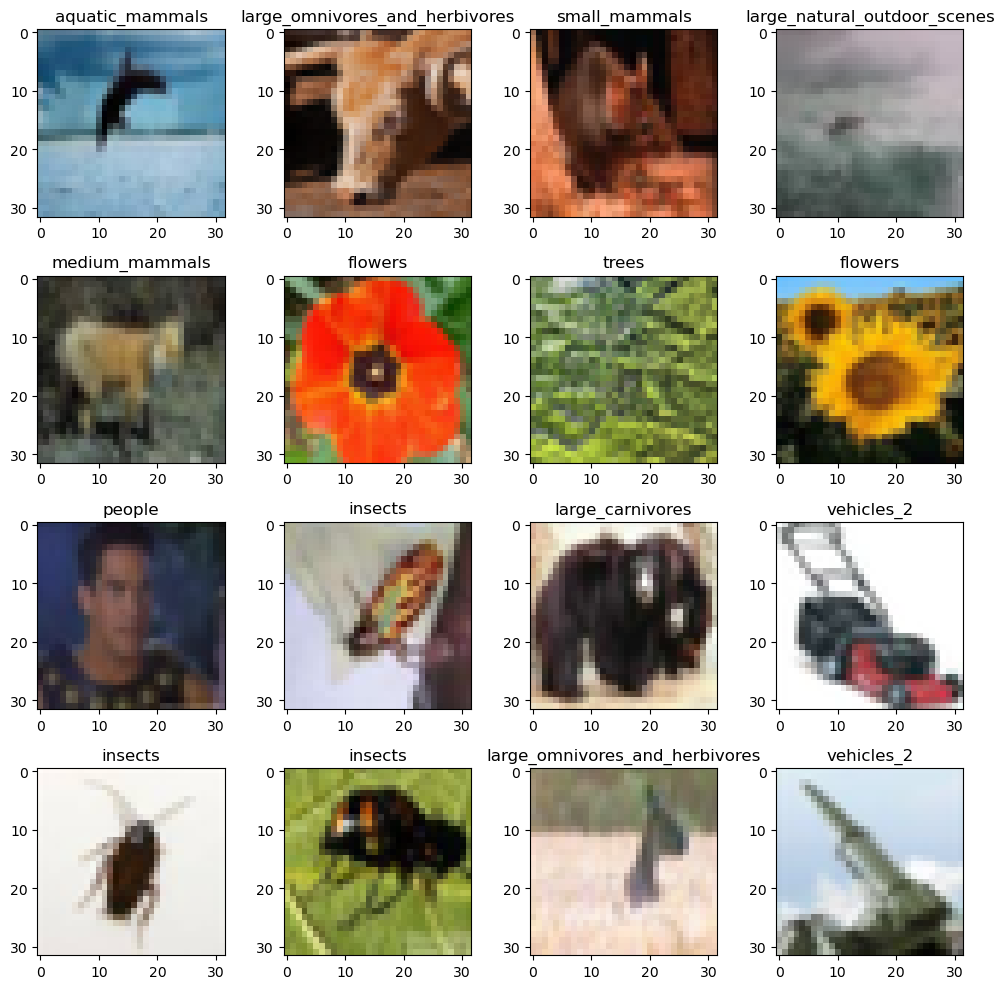

In [49]:
# Назначаем количество групп (superclasses)
nclass = 20
# Приведем значения групп (superclasses) к двоичной классификации
# Используем команду numpy.eye, которая возвращает двумерный массив с единицами по диагонали 
# и нулями в остальных значениях матрицы.
y_train_cat = np.eye(nclass)[y_train]


fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4*4):
    rand = random.randint(0, len(X_train))
    ax = axs[i // 4, i % 4]
    ax.imshow(X_train[rand])
    ax.set_title(meta[np.argmax(y_train_cat[rand])].decode("utf-8"))

plt.tight_layout()
plt.show()

## 2.4 Прототип модели

1) Определить подходящие для задачи модели и обучить их
2) Выбрать наилучшую модель, на которой провести кросс-валидацию и настройку гипер-параметров

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
# Инициализация моделей
models = {
    "Логистическая регрессия": LogisticRegression(max_iter=1000),
    "K-ближайших соседей": KNeighborsClassifier(),
    "Решающее дерево": DecisionTreeClassifier(),
    "Случайный лес": RandomForestClassifier(),
    "Градиентный бустинг": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LGBMClassifier": LGBMClassifier(),
    "CatBoostClassifier": CatBoostClassifier(verbose=0)
}

In [55]:
# # Для хранения результатов
# results = {}

# colors = ['blue', 'green', 'red', 'purple', 'darkgoldenrod']  # Цвета для каждого класса

# # Визуализация границ решений для каждой модели
# for name, model in models.items():
    
#     # Обучение модели и получение предсказаний для каждой точки в сетке
#     model.fit(X_train, y_train)
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     y_pred = model.predict(X_test)
#     y_prob = model.predict_proba(X_test)

#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='macro')
#     recall = recall_score(y_test, y_pred, average='macro')
#     f1 = f1_score(y_test, y_pred, average='macro')
#     roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

#     results[name] = {
#         "Accuracy": accuracy,
#         "Precision": precision,
#         "Recall": recall,
#         "F1 Score": f1,
#         "roc_auc": roc_auc
#     }

# results_df = pd.DataFrame.from_dict(results, orient='index')
# display(results_df.sort_values(['Accuracy', 'F1 Score'], ascending=False))

# 3 Разработка модели и валидация

## 3.1 Кросс-валидация

In [ ]:
# # Кросс-валидация - разбивка на k частей (в данном случае 5 частей).
# # На четырех частях будет производится обучение модели, а последняя часть будет использоваться для тестирования.
# # Кросс-валидация будет проходить только на тренировочных данных

# rf = CatBoostClassifier(verbose=0)

# scores = cross_val_score(rf, x_train, y_train, cv=5)


In [ ]:
scores

array([0.34453125, 0.35109375, 0.34984375, 0.35578125, 0.36015625])

## 3.2 Настройка гиперпараметров

## 3.3 Окончательная версия модели